# **Credit Card Customer Segmentation using Clustering**

In this checkpoint, you are going to work on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.

#### **Dataset description:**
The dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during a 6 months period.

This case requires you to **develop a customer segmentation to define marketing strategy**.

In [ ]:
# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Loading the dataset
df = pd.read_csv("Credit_card_dataset.csv")

# Data Exploration
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (8950, 6)


In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64


In [ ]:
# Dropping missing values and duplicates
df = df.dropna()
df = df.drop_duplicates()

In [ ]:
# Dataset Info
print("\nDataset info after cleaning:")
df.info()


Dataset info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8949 non-null   object 
 1   BALANCE_FREQUENCY  8949 non-null   float64
 2   PURCHASES          8949 non-null   float64
 3   PAYMENTS           8949 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8949 non-null   float64
dtypes: float64(5), object(1)
memory usage: 489.4+ KB


### **Hierarchical Clustering**

In [ ]:
# Selecting and standardizing features
X = df[["PURCHASES", "CREDIT_LIMIT"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

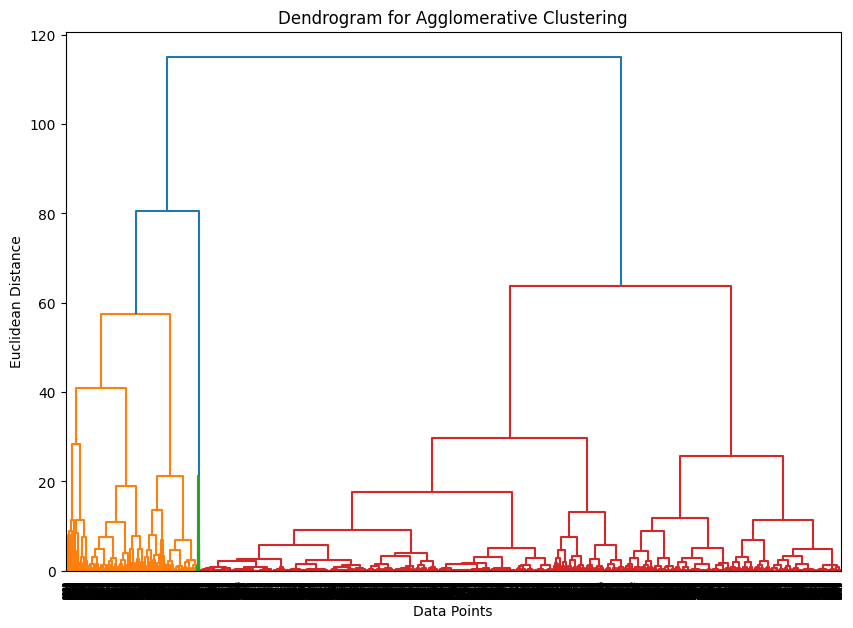

In [ ]:
# Creating linkage matrix and dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
# Applying Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
df['Cluster'] = agglom.fit_predict(X_scaled)

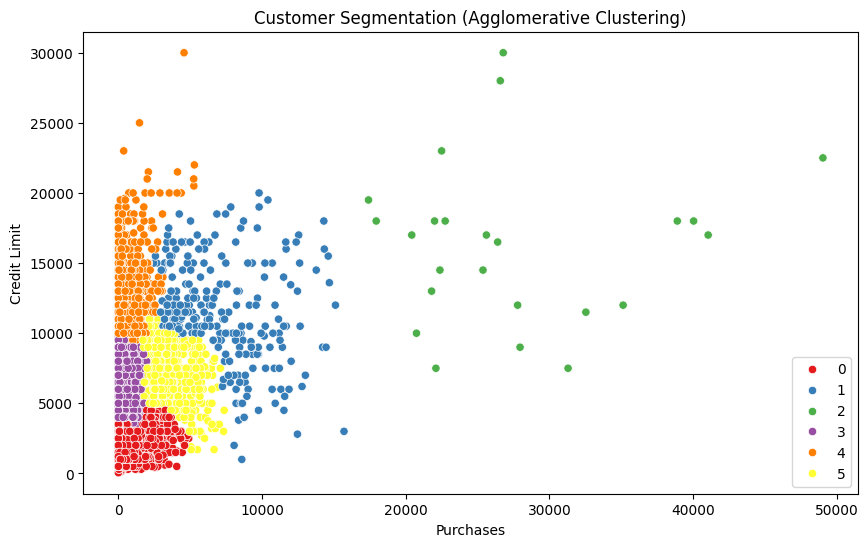

In [ ]:
# Plotting Agglomerative Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PURCHASES'], y=df['CREDIT_LIMIT'], hue=df['Cluster'], palette='Set1')
plt.title('Customer Segmentation (Agglomerative Clustering)')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.legend()
plt.show()

### **Interpretation of Agglomerative Clustering Results**
- Clusters are tightly packed in the lower range of the PURCHASES axis, with most below 10,000.

- Cluster 2 appears isolated representing high spenders with significantly higher purchase amounts, and mid-to-high credit limits.

Generally, the hierarchical clustering nicely separates smaller, distinct groups, especially at low purchase volumes, but some overlaps still exist visually.

### **K-Means Clustering**

In [ ]:
# Reloading and restandardizing clean dataset
df = pd.read_csv("Credit_card_dataset.csv")
df = df.dropna()
X = df[["PURCHASES", "CREDIT_LIMIT"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

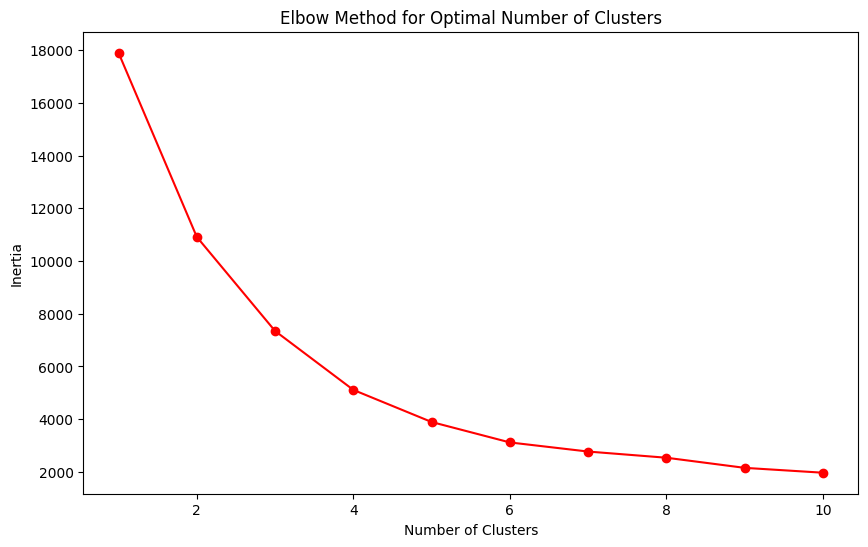

In [ ]:
# Determining optimal k using Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, 'ro-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Applying KMeans with chosen k
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

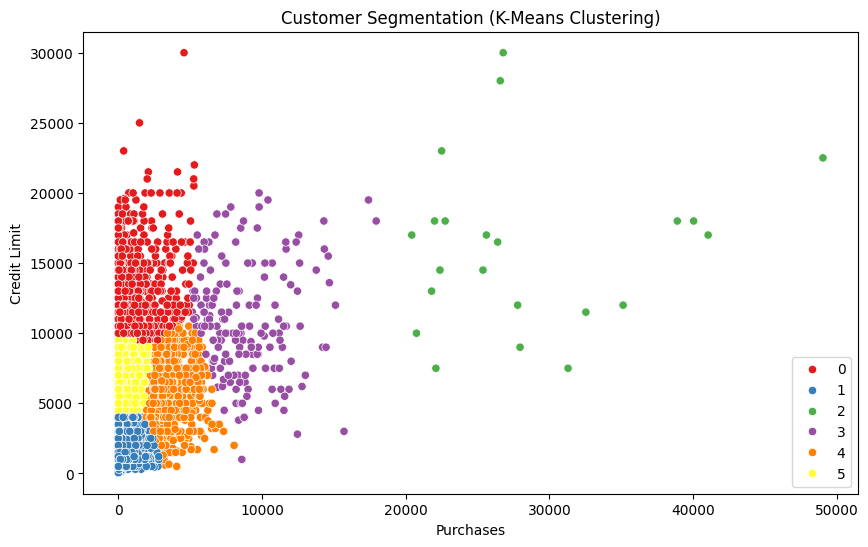

In [ ]:
# Plotting K-Means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PURCHASES'], y=df['CREDIT_LIMIT'], hue=df['Cluster'], palette='Set1')
plt.title('Customer Segmentation (K-Means Clustering)')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.legend()
plt.show()

### **Interpretation of K-Means Clustering Results**

- K-Means generated more evenly spaced clusters across the feature space compared to the Agglomerative. There is also better separation in low-mid purchase volume customers, and arguably a more balanced segmentation.

- A similar cluster for high spenders (Cluster 2) is also captured here, which validates its significance.

### **Strategic Business Insight from the Results**

- Cluster 2 (High Purchasers), could be targeted for premium rewards programs or loyalty benefits.

- Clusters with low purchase and high credit (possible credit under-utilizers), may be nudged with offers to increase card usage.

- Low purchase + low credit groups, may benefit from usage education or minimal marketing focus if Return On Investment (ROI) is low.